In [2]:
%matplotlib inline 
import Calculate_ABA_Finkelsteinlab as ABA
reload(ABA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns 
sns.set_style('ticks');
current_color = sns.color_palette();
sns.set_palette('Set2');

#import plotsettings 
#publishable = plotsettings.Set('Cell') 

# Adjust all text and axes colors to black. default is some studip gray that appears to faint when printed 
from matplotlib import rc , rcParams
rc('axes',edgecolor='black')
rc('xtick',color='black',labelsize=15)
rc('ytick',color='black',labelsize=15)
rc('text',color='black')
rc('axes',labelcolor='black',linewidth=2.0)
rc('font',size=15)
rcParams["patch.force_edgecolor"] = True

In [4]:
Path = '../Data_Boyle/KoenDataForMisha/3ModelFit/'
OT_landscape = np.loadtxt(delimiter=',', fname=Path+'3ModelOTLandscape.txt')
epsilon_C = np.diff(OT_landscape)
epsilon_I = np.loadtxt(delimiter=',', fname=Path+'3ModelMismatches.txt')-epsilon_C[1:]
rates = np.loadtxt(delimiter='\n', fname=Path+'3ModelRates.txt')
epsilon = np.append(-epsilon_C, epsilon_I)
epsilon[0] = -epsilon[0]
parameters = np.append(epsilon, rates)

In [13]:
concentrations = 2**np.array(range(0,11))*0.5
reference = 10.0


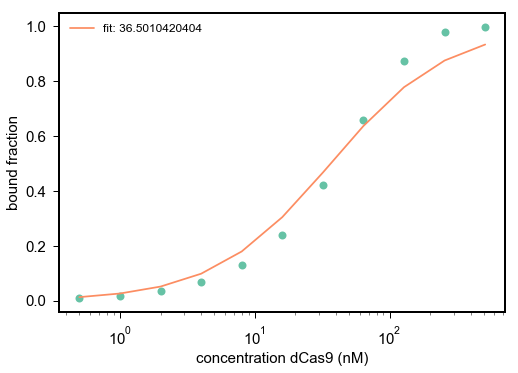

In [57]:
reload(ABA)
Kd, Pbound,_ = ABA.calc_Pbound(parameters, concentrations, reference, mismatch_positions=[], 
                model_id = 'general_energies', guide_length = 20, T=10*60)

plt.plot(concentrations, Pbound, marker='o', markersize=8, linestyle='', label='')
plt.plot(concentrations, ABA.Hill_eq(concentrations,Kd), label='fit: %s'%(Kd))
plt.legend(fontsize=12);
plt.xlabel('concentration dCas9 (nM)',fontsize=15);
plt.ylabel('bound fraction',fontsize=15);
plt.xscale('log');

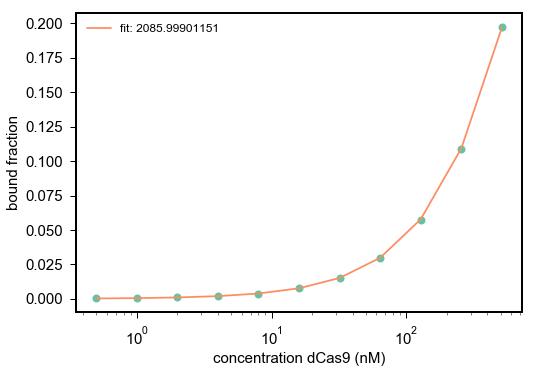

In [36]:
reload(ABA)
Kd, Pbound,_ = ABA.calc_Pbound(parameters, concentrations, reference, mismatch_positions=[2,3], 
                model_id = 'general_energies', guide_length = 20, T=10*60)

plt.plot(concentrations, Pbound, marker='o', markersize=8, linestyle='', label='')
plt.plot(concentrations, ABA.Hill_eq(concentrations,Kd), label='fit: %s'%(Kd))
plt.legend(fontsize=12);
plt.xlabel('concentration dCas9 (nM)',fontsize=15);
plt.ylabel('bound fraction',fontsize=15);
plt.xscale('log');

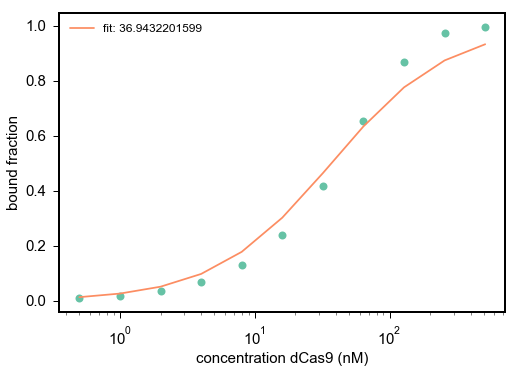

In [37]:
reload(ABA)
Kd, Pbound,_ = ABA.calc_Pbound(parameters, concentrations, reference, mismatch_positions=[19,20], 
                model_id = 'general_energies', guide_length = 20, T=10*60)

plt.plot(concentrations, Pbound, marker='o', markersize=8, linestyle='', label='')
plt.plot(concentrations, ABA.Hill_eq(concentrations,Kd), label='fit: %s'%(Kd))
plt.legend(fontsize=12);
plt.xlabel('concentration dCas9 (nM)',fontsize=15);
plt.ylabel('bound fraction',fontsize=15);
plt.xscale('log');

In [30]:
ontarget_ABA = ABA.calc_ABA(parameters, concentrations, reference, mismatch_positions=[], model_id = 'general_energies', guide_length = 20, T=10*60)

In [50]:
delta_ABA_mat = np.zeros((20,20))

for i in range(0,20):
    for j in range(0,20):
        mismatch_positions = [20-i, 20-j]
        if i==j:
            mismatch_positions = [20-i]
        delta_ABA_mat[i,j] = ABA.calc_delta_ABA(parameters, concentrations, reference, mismatch_positions,ontarget_ABA, 
                                                model_id = 'general_energies', guide_length = 20, T=10*60)

wrong_PAM = parameters.copy()
wrong_PAM[0] *= 5.
nonsense_ABA = ABA.calc_delta_ABA(wrong_PAM, concentrations, reference, mismatch_positions=range(1,21),
                                  ontarget_ABA=ontarget_ABA, 
                                                model_id = 'general_energies', guide_length = 20, T=10*60)

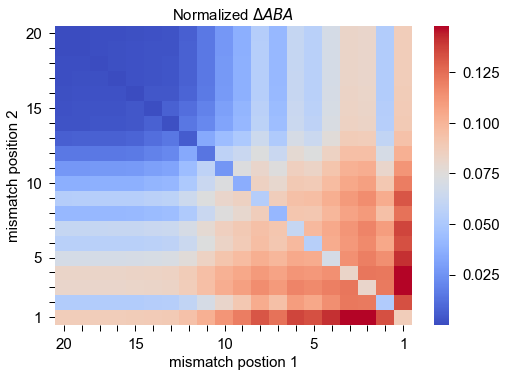

In [58]:


sns.heatmap(delta_ABA_mat/nonsense_ABA, cmap='coolwarm',cbar=True);

plt.xticks([i+0.5 for i in range(20)], 
           [20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);

plt.yticks([i+0.5 for i in range(20)], 
           [1,'','','',5,'','','','',10,'','','','',15,'','','','',20], rotation=0);
plt.xlabel('mismatch postion 1', fontsize=15)
plt.ylabel('mismatch position 2', fontsize=15)
plt.title('Normalized $\Delta ABA$',fontsize=15)